In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


In [ ]:
drug_choice = pd.read_csv("/content/drug200.csv")
drug_choice

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
drug_choice['Sex']= drug_choice.Sex.map({'F':0,'M':1})
drug_choice['BP']= drug_choice.BP.map({'HIGH':2,'LOW':0,'NORMAL':1})
drug_choice['Cholesterol']= drug_choice.Cholesterol.map({'NORMAL':0,'HIGH':1})
drug_choice['Drug']= drug_choice.Drug.map({'drugA':1001,'drugB':1002,'drugC':1003,'drugX':1004,'drugY':1005})
drug_choice


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,1005
1,47,1,0,1,13.093,1003
2,47,1,0,1,10.114,1003
3,28,0,1,1,7.798,1004
4,61,0,0,1,18.043,1005
...,...,...,...,...,...,...
195,56,0,0,1,11.567,1003
196,16,1,0,1,12.006,1003
197,52,1,1,1,9.894,1004
198,23,1,1,0,14.020,1004


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= drug_choice[['Age','Sex','BP','Cholesterol','Na_to_K']]
y= drug_choice['Drug']

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state = 3)
X_trainset


,Age,Sex,BP,Cholesterol,Na_to_K
156,31,1,2,0,11.227
115,51,1,2,1,18.295
155,49,1,0,1,10.537
15,16,0,2,0,15.516
61,24,1,2,0,9.475
...,...,...,...,...,...
0,23,0,2,1,25.355
184,18,0,2,1,37.188
131,52,1,0,0,32.922
152,55,1,1,0,7.261


In [ ]:
 print (X_testset.shape,y_testset.shape)


(40, 5) (40,)


In [ ]:
 print (X_trainset.shape,y_trainset.shape)

(160, 5) (160,)


In [ ]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth =4)
drugTree 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predTree = drugTree.predict(X_testset)

In [ ]:
print (predTree[0:5])
print (y_testset[0:5])


[1005 1004 1004 1004 1004]
40     1005
51     1004
139    1004
197    1004
170    1004
Name: Drug, dtype: int64


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


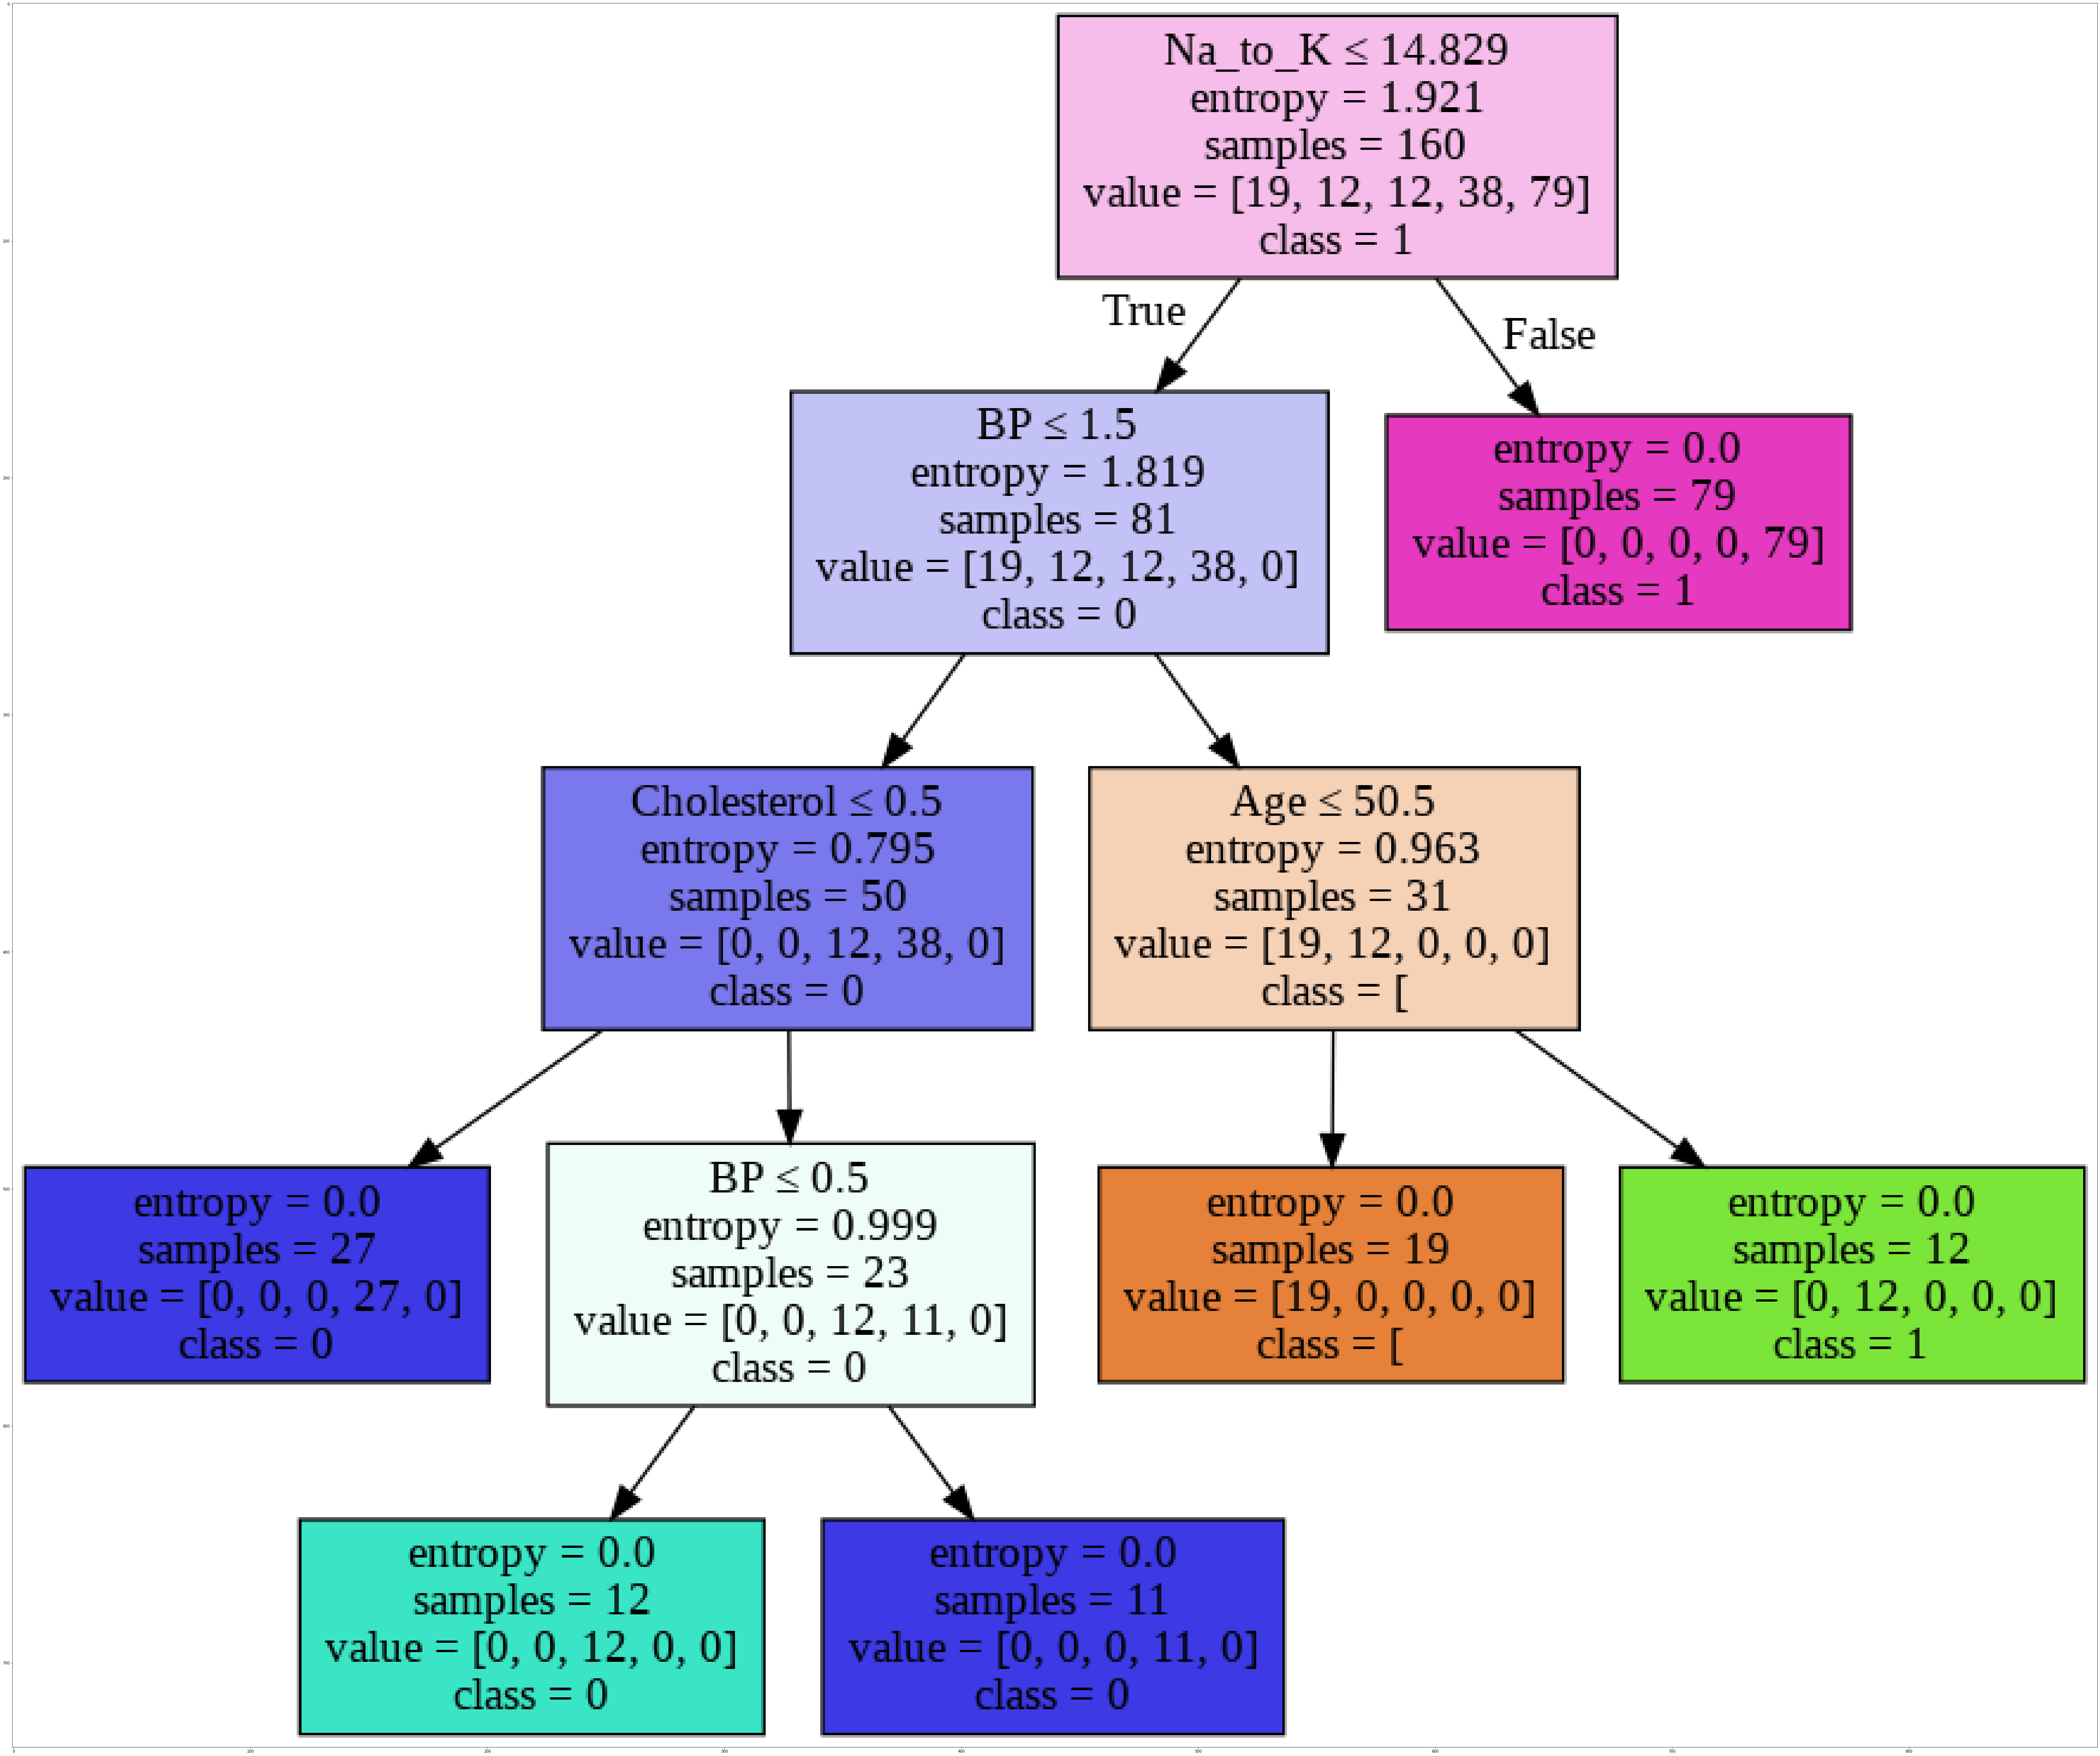

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = drug_choice.columns[0:5]
targetNames = drug_choice["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree , feature_names=featureNames, out_file=dot_data, class_names= str(np.unique( y_trainset ) ), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
x_new = [[23,1,1,1,27.5],[25,0,1,1,26]]
predTree = drugTree.predict(x_new )
predTree

array([1005, 1005])